In [58]:
import pandas as pd
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import helper_functions
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec
from pydlv import dl_generator, dl_model_4, dl_plotter
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

helper = helper_functions.HelperFunctions()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
data_path = 'C:/Users/Arkady/Google Drive/data/beyond_the_reach'
figure_path = 'C:/Users/Arkady/Dropbox/Research/Journal papers/2018 Beyond the reach/figures'

figure_format = '.png'

index=['subj_id', 'task', 'trial_no']

choices = pd.read_csv(os.path.join(data_path, 'choices_processed.txt'))
dynamics = pd.read_csv(os.path.join(data_path, 'dynamics_processed.txt'))

choices = choices.set_index(index, drop=False)
dynamics = dynamics.set_index(index, drop=False)

dynamics = dynamics.join(choices.option_chosen)

dynamics['Lambda_q'] = choices['Lambda_q']
dynamics['Delta_q'] = choices['Delta_q']

In [7]:
dynamics_walking = dynamics.loc[dynamics.task=='walking', :]
dynamics_mouse = dynamics.loc[dynamics.task=='mouse', :]

choices_walking = choices.loc[choices.task=='walking', :]
choices_mouse = choices.loc[choices.task=='mouse', :]

In [6]:
dynamics_norm = dynamics
walking_x_lim = dynamics_walking.groupby(dynamics_walking.index.names).last().x.abs().mean()
walking_y_lim = dynamics_walking.groupby(dynamics_walking.index.names).last().y.mean()

mouse_x_lim = dynamics_mouse.groupby(dynamics_mouse.index.names).last().x.abs().mean()
mouse_y_lim = dynamics_mouse.groupby(dynamics_mouse.index.names).last().y.mean()

dynamics_norm.loc[dynamics_norm.task=='walking', ['x', 'vx']] /= walking_x_lim
dynamics_norm.loc[dynamics_norm.task=='walking', ['y', 'vy']] /= walking_x_lim
dynamics_norm.loc[dynamics_norm.task=='mouse', ['x', 'vx']] /= mouse_x_lim
dynamics_norm.loc[dynamics_norm.task=='mouse', ['y', 'vy']] /= mouse_x_lim

# Mean trajectories

In [14]:
def get_average_trajectories(dynamics, variables):
    cols = dynamics.index.names + variables    
    dynamics_transposed = dynamics.groupby(by = cols). \
                    apply(lambda x: x.loc[:, ['x', 'y']].reset_index(drop=True).T)
    cols += ['x/y']
    dynamics_transposed.index.names = cols
    
    subj_mean_traj = dynamics_transposed.groupby(level=variables + ['x/y']).apply(np.mean).stack()
    
    subj_mean_traj.index.names = variables + ['x/y', 't']
    subj_mean_traj = subj_mean_traj.unstack('x/y')
    return subj_mean_traj

mean_traj_walking = get_average_trajectories(dynamics_walking, ['option_chosen', 'Delta_q'])
mean_traj_mouse = get_average_trajectories(dynamics_mouse, ['option_chosen', 'Delta_q'])

mean_traj_walking_no_com = get_average_trajectories(dynamics_walking[~choices_walking.is_com], 
                                                    ['option_chosen', 'Delta_q'])
mean_traj_mouse_no_com = get_average_trajectories(dynamics_mouse[~choices_mouse.is_com], 
                                                  ['option_chosen', 'Delta_q'])

C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'subj_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'task' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'trial_no' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key 

In [27]:
def plot_mean_trajectories(mean_trajectories, var='Lambda_q', plot_bar=False):
    sns.set_palette('viridis')
    sns.set_context("notebook", font_scale=2.5)
    fig, ax = plt.subplots(1, figsize=(10, 10))
#     plt.set_cmap('viridis')
    ax.set_aspect(1, adjustable='datalim')
    colors = {'Low': 'C0',
              'Medium': 'C3',
              'High': 'C5'}
    
    for name, group in mean_trajectories.groupby(['option_chosen', var]):
        ax.plot(mean_trajectories.loc[name].x, mean_trajectories.loc[name].y, 
                lw=4, color=colors[name[1]])
    ax.text(s='Larger \nbut later', x=0.85, y=1.05, 
            horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(s='Smaller \nbut sooner', x=0.15, y=1.05, 
            horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    
    if plot_bar:
        x_bar = [-0.2, 0.2]
        y_bar = -0.05
        ax.plot(x_bar, [y_bar, y_bar], lw=5, color='grey')
    
    ax.tick_params(axis='both', which='major')

    custom_lines = [Line2D([0], [0], color='C0', lw=4),
                    Line2D([0], [0], color='C3', lw=4),
                    Line2D([0], [0], color='C5', lw=4)]

    ax.legend(custom_lines, ['Low $\Delta$', 'Medium $\Delta$', 'High $\Delta$'], loc=5)
#     ax.legend()

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


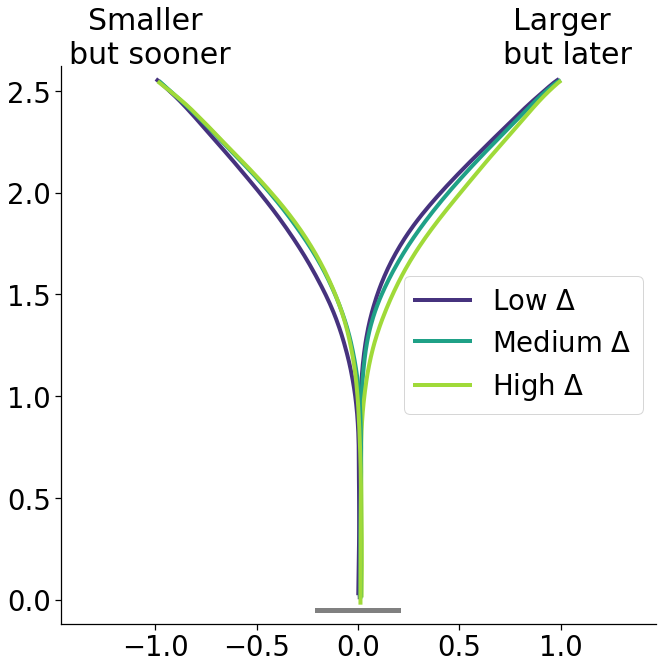

In [28]:
plot_mean_trajectories(mean_traj_walking, var='Delta_q', plot_bar=True)
plt.savefig(os.path.join(figure_path, 'mean_traj_walking'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


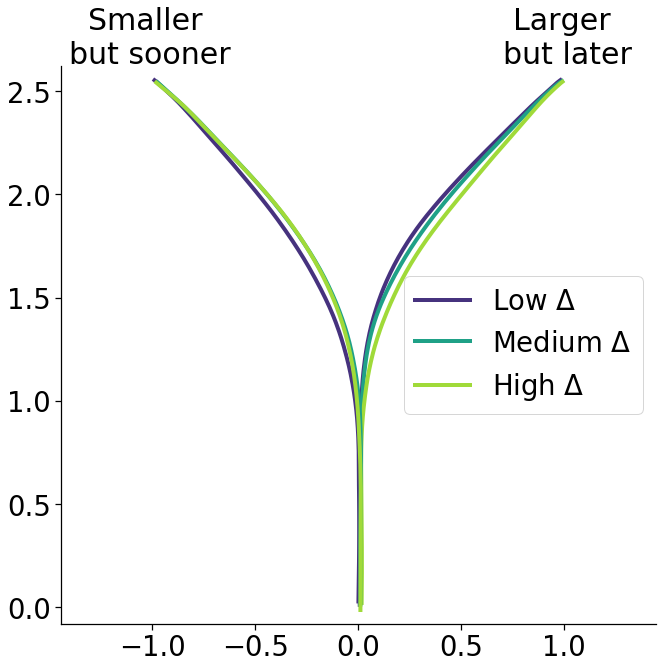

In [29]:
plot_mean_trajectories(mean_traj_walking_no_com, var='Delta_q')
plt.savefig(os.path.join(figure_path, 'mean_traj_walking_no_com'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


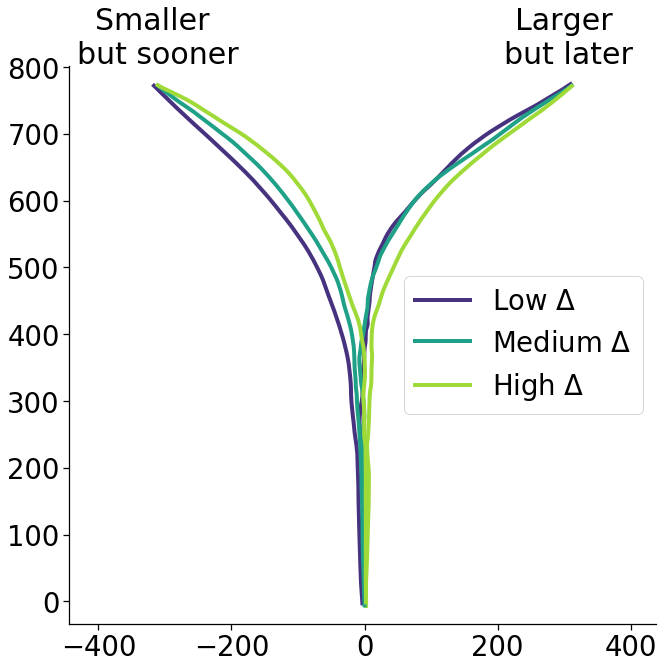

In [30]:
plot_mean_trajectories(mean_traj_mouse, var='Delta_q')
plt.savefig(os.path.join(figure_path, 'mean_traj_mouse'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


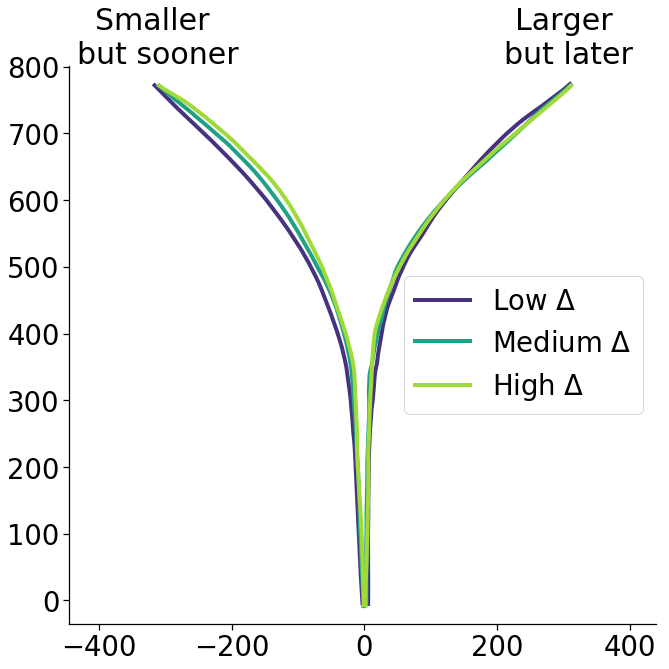

In [31]:
plot_mean_trajectories(mean_traj_mouse_no_com, var='Delta_q')
plt.savefig(os.path.join(figure_path, 'mean_traj_mouse_no_com'+figure_format))

# Decision landscapes

In [59]:
def get_dlv_params(trajs, dlg):
    start_x = trajs.groupby(trajs.index.names).first().x.mean()
    start_y = trajs.groupby(trajs.index.names).first().y.mean()
    
    stim_x = trajs.groupby(trajs.index.names).last().x.abs().mean()
    stim_y = trajs.groupby(trajs.index.names).last().y.mean()
    
    trajs.loc[:, ['x', 'y']] -= [start_x, start_y]
    trajs.loc[:, ['x', 'y', 'vx', 'vy']] /= [stim_x, stim_y, stim_x, stim_y]
    
    params = dlg.fit_dl_mult_traj(trajs, index_cols = trajs.index.names)    
    return params

def plot_dlv(dlp, dlg, params, color):
    sns.set_palette('viridis')
    
    x, y, dl = dlg.get_model_dl(params.loc[:, dlg.model.get_param_names()].values[0])
    dlp.plot_surface(x, y, dl, color=color, alpha=0.7, plot_marble=False)

In [22]:
choices_walking['Delta_q'] = pd.qcut(choices.Delta, q=3, labels=['Low', 'Medium', 'High'])

model = dl_model_4.DLModel4()           
dlg = dl_generator.DLGenerator(model)

low_params = get_dlv_params(trajs=dynamics_walking[choices_walking['Delta_q']=='Low'], dlg=dlg)
medium_params = get_dlv_params(trajs=dynamics_walking[choices_walking['Delta_q']=='Medium'], dlg=dlg)
high_params = get_dlv_params(trajs=dynamics_walking[choices_walking['Delta_q']=='High'], dlg=dlg)

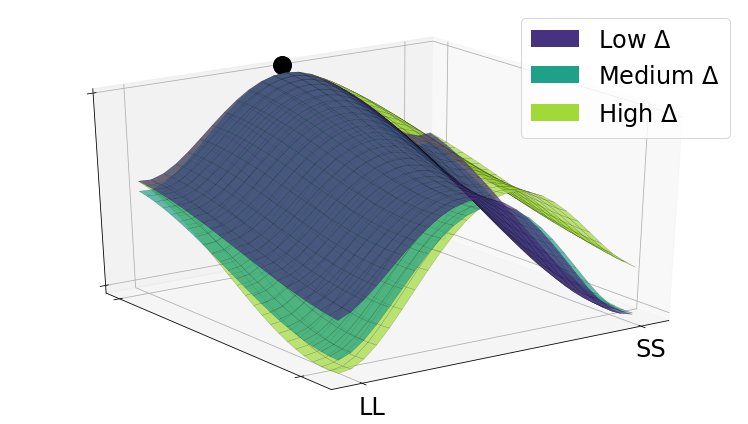

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
dlp = dl_plotter.DLPlotter(azim=55)

plot_dlv(dlp, dlg, low_params, color='C0')
plot_dlv(dlp, dlg, medium_params, color='C3')
plot_dlv(dlp, dlg, high_params, color='C5')

dlp.add_legend(['C0', 'C3', 'C5'], labels=['Low $\Delta$', 'Medium $\Delta$', 'High $\Delta$'])
dlp.ax.set_xlabel('')
dlp.ax.set_ylabel('')

# dlp.ax.text(0.95, 1, -0.65, "LL", color='k', fontdict={'fontsize': 24})
# dlp.ax.text(-0.9, 1, -0.65, "SS", color='k', fontdict={'fontsize': 24})

dlp.ax.set_xticks([-1, 1])
dlp.ax.set_xticklabels(['SS', 'LL'], fontdict={'fontsize': 24})
dlp.ax.set_yticks([0, 1])
dlp.ax.set_yticklabels([])
# dlp.ax.set_zticks([0, -0.6])
dlp.ax.set_zticklabels([])

dlp.ax.plot([0.0], [0.], [0.02], marker='o', markersize=18, color='black')

plt.tight_layout()
plt.savefig(os.path.join(figure_path, 'dlv_delta'+figure_format))

# Posterior plots

In [27]:
sns.set_palette('viridis')
sns.set_context("notebook", font_scale=1.2)

In [25]:
def plot_posterior_kde(posterior_samples, colors, alpha, ax):
    for choice in ['ss', 'll']:
        samples = posterior_samples.loc[posterior_samples.option_chosen==choice, 'beta']
        kde = gaussian_kde(samples)
        x_grid = np.linspace(samples.min(), samples.max(), 51)

        ax.plot(x_grid, kde(x_grid), color=colors[choice], alpha=alpha)

        ax.fill_between(x_grid, kde(x_grid), color=colors[choice], alpha=alpha,
                        where=(x_grid>samples.quantile(0.025))&(x_grid<samples.quantile(0.975)))

def plot_posterior_comparison(iv, task, dv, exclude_com, colors, ax):
    file_name = 'posterior_csv/%s/posterior_%s%s_%s.csv' % (iv, task, '_no_com' if exclude_com else '', dv)
    posterior_samples = (pd.read_csv(file_name)
                             .filter(regex=('b_option_chosen.*:%s' % (iv)))
                             .stack()
                             .reset_index()
                             .drop('level_0', axis=1)
                             .rename(index=str, columns={'level_1': 'option_chosen', 0: 'beta'}))
    
    # TODO: that's a dirty trick, replace 15:17 with a proper regex!
    posterior_samples['option_chosen'] = posterior_samples['option_chosen'].str[15:17]
    alpha = 0.3 if exclude_com else 0.9
    plot_posterior_kde(posterior_samples, colors, alpha, ax)
    
    x_max = 1.1*max(abs(posterior_samples.beta))
    ax.set_xlim((-x_max, x_max))
    ax.set_xlabel(r'$b_{\%s}$' % (iv))
    ax.set_ylabel('pdf')

def plot_all_posteriors(iv):
    colors={'ll': 'C0', 'ss': 'C4'}
    
    fig, axes = plt.subplots(2,2, figsize=(10,5))
    i = 0
    for task in ['walking', 'mouse']:
        for dv in ['max_d', 'RT']:
            ax = axes.flatten()[i]            
            plot_posterior_comparison(iv, task, dv, exclude_com=True, colors=colors, ax=ax)
            plot_posterior_comparison(iv, task, dv, exclude_com=False, colors=colors, ax=ax)
            ax.set_title(task + ' ' + dv.replace('_', '-'))
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            i+=1
    
    legend_elements = [Patch(facecolor=colors[choice], label=choice) for choice in ['ss', 'll']]

    fig.legend(handles=legend_elements, title='choice', loc='center left', 
               bbox_to_anchor=(0.9, 0.8), ncol=1, frameon=False)
    plt.tight_layout(pad=1.1, w_pad=0.1, h_pad=0.1)

    plt.savefig(os.path.join(figure_path, 'posterior_' + iv + figure_format), dpi=300)

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


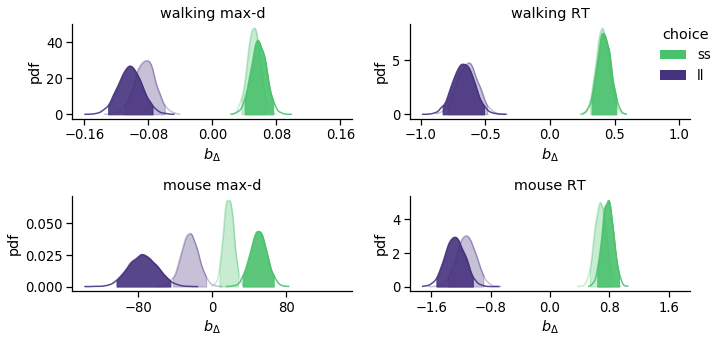

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


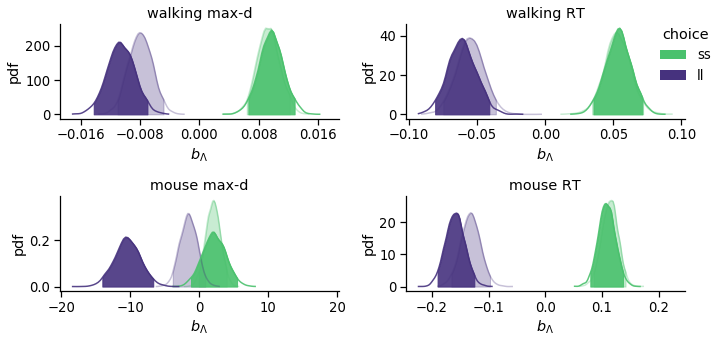

In [37]:
plot_all_posteriors(iv='Delta')

plot_all_posteriors(iv='Lambda')

### Main effect of choice

In [34]:
sns.set_palette('viridis')
sns.set_context("notebook", font_scale=1.5)

def plot_choice_posterior(iv, task, dv, exclude_com, ax, alpha):
    file_name = 'posterior_csv/%s/posterior_%s%s_%s.csv' % (iv, task, '_no_com' if exclude_com else '', dv)
    samples = (pd.read_csv(file_name).loc[:, 'b_option_chosenss'])
    kde = gaussian_kde(samples)
        
    x_grid = np.linspace(samples.min(), samples.max(), 51)

    ax.plot(x_grid, kde(x_grid), color='grey', alpha=alpha)

    ax.fill_between(x_grid, kde(x_grid), color='grey', alpha=alpha,
                    where=(x_grid>samples.quantile(0.025))&(x_grid<samples.quantile(0.975)))
    
    x_max = 1.1*max(abs(samples))
    ax.set_xlim((-x_max, x_max))
    ax.set_ylabel('pdf')
    
    ax.set_title(task + ' ' + dv.replace('_', '-'))
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
        
def plot_choice_posteriors(iv):    
    fig, axes = plt.subplots(2, 2, figsize=(10,5))
    i = 0
    for task in ['walking', 'mouse']:
        for dv in ['max_d', 'RT']:
            ax = axes.flatten()[i]
            plot_choice_posterior(iv, task, dv, exclude_com=True, ax=ax, alpha=0.3)
            plot_choice_posterior(iv, task, dv, exclude_com=False, ax=ax, alpha=0.8)            
            if i>=2:
                ax.set_xlabel(r'$b_{\mathrm{choice}}$')
            i+=1
    plt.tight_layout(pad=1.1, w_pad=0.2, h_pad=0.2)
    plt.savefig(os.path.join(figure_path, 'posterior_choice_' + iv + figure_format), dpi=300)

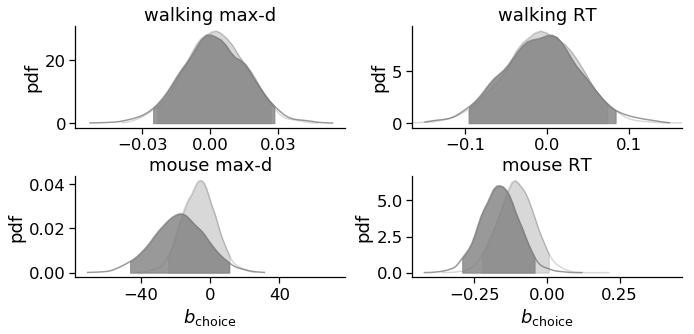

In [35]:
plot_choice_posteriors('Delta')

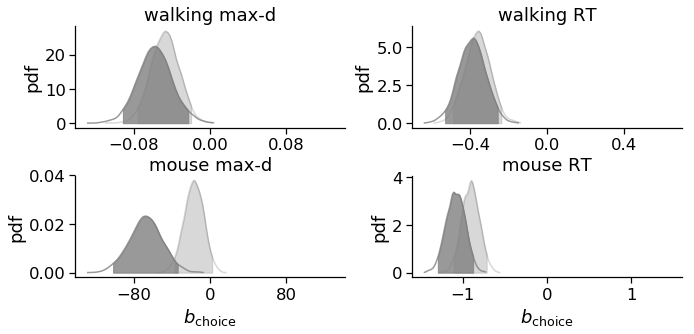

In [36]:
plot_choice_posteriors('Lambda')

# Descriptive statistics

Rate of changes-of-mind

In [5]:
len(choices_mouse[~choices_mouse.is_com])/len(choices_mouse)

0.9088353413654618

In [6]:
len(choices_walking[~choices_walking.is_com])/len(choices_walking)

0.9893920848633211

<IPython.core.display.Javascript object>


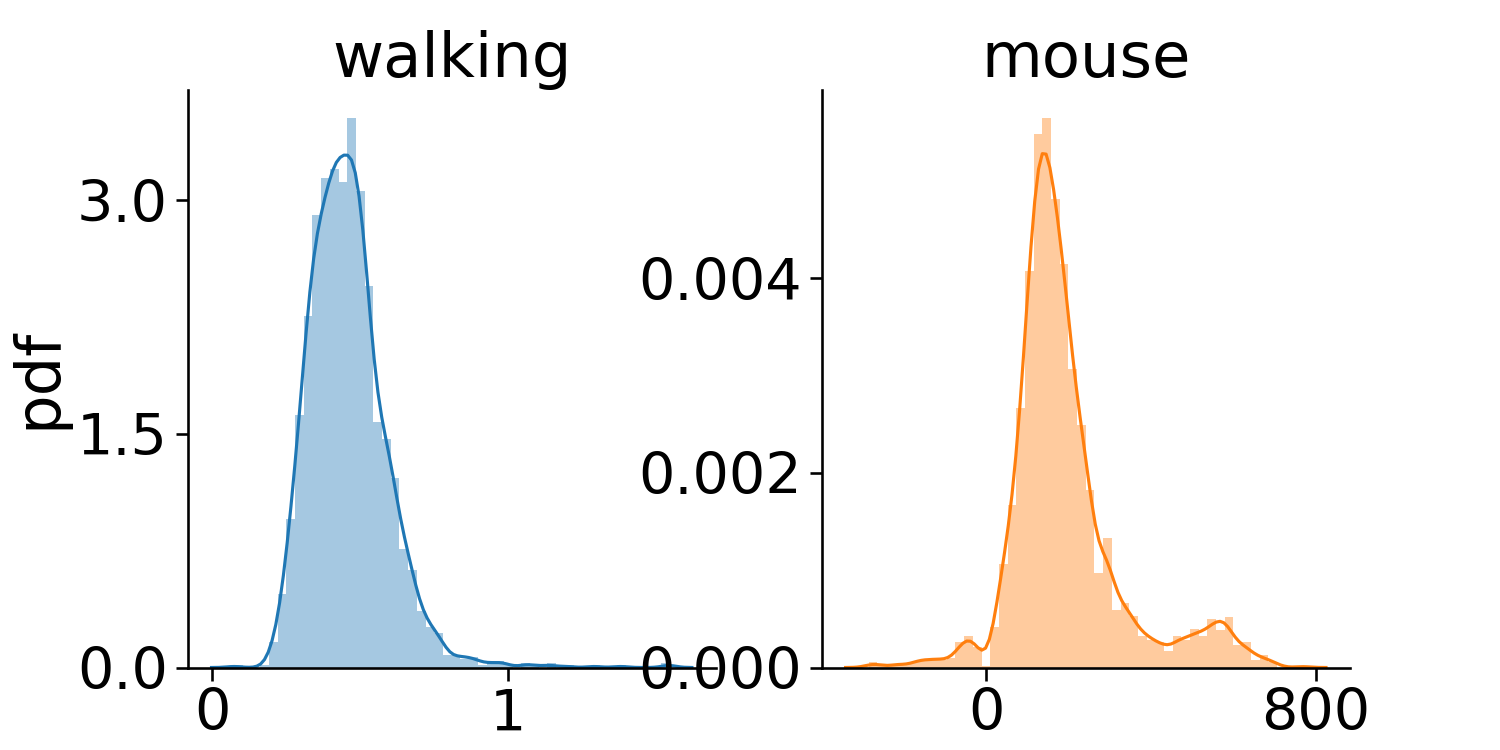

In [4]:
sns.set_palette("tab10")
sns.set_context("notebook", font_scale=2.5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5)) 

sns.distplot(choices_walking.max_d, color='C0', ax=ax1)
ax1.set_xlabel('max-d')
ax1.set_ylabel('pdf')
ax1.set_title('walking')

sns.distplot(choices_mouse.max_d, color='C1', ax=ax2)
ax2.set_xlabel('max-d')
ax2.set_title('mouse')

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(plt.MaxNLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))

plt.savefig(os.path.join(figure_path, 'max_d_distribution'+figure_format))

# Hypothesis 2

In [4]:
k_values_task, ip_task = helper.get_k_values(choices, by='task', log=False)
k_values_session, ip_session = helper.get_k_values(choices, by='session', log=False)

D:\source\beyond_the_reach\data_analysis\helper_functions.py:55: FutureWarning: 'subj_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  indiff_points = (choices_sc.groupby(['subj_id', by, 'll_delay'])
D:\source\beyond_the_reach\data_analysis\helper_functions.py:55: FutureWarning: 'task' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  indiff_points = (choices_sc.groupby(['subj_id', by, 'll_delay'])


In [57]:
def plot_discounting_and_k_hist(k_diff, indifference_points, by, palette, colors, log=False):
    sns.set_palette(palette)
    sns.set_context('notebook', font_scale=1.8)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    sns.lineplot(data=indifference_points, x='ll_delay', y='indiff_point', hue=by, style=by, 
                     marker='o', ms=10, markers=True, palette=colors, ax=ax1)
    ax1.set_ylim(0, 0.9)
    ax1.set_xlabel('delay')
    ax1.set_ylabel('subjective value')
    ax1.get_legend().texts[0].set_text(by)
    
    if(log):
        ax1.set_xscale('log')
        
    sns.distplot(k_diff, bins=np.linspace(-0.4, 0.4, 20), color='k', norm_hist=False, kde=False, ax=ax2)
    ax2.set_ylabel('number of subjects')
    ax2.axvline(0.0, alpha=0.3, color='k')
    
    return((ax1, ax2))  

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


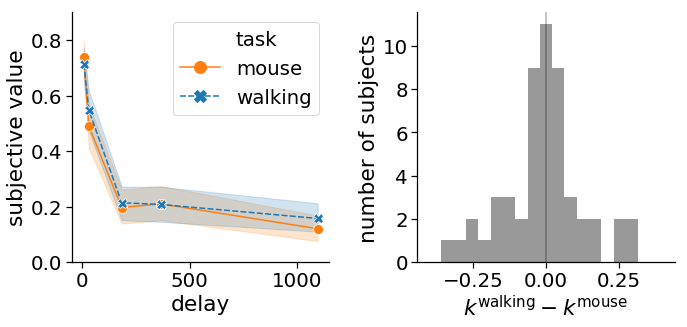

In [10]:
ax1, ax2 = plot_discounting_and_k_hist(k_diff = k_values_task['walking'] - k_values_task['mouse'], 
                                       indifference_points=ip_task, by='task', 
                                       palette='tab10', colors=['C1', 'C0'], log=False)

ax2.set_xlabel(r'$k^{\mathrm{walking}}-k^{\mathrm{mouse}}$');
plt.savefig(os.path.join(figure_path, 'k_task_prereg'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


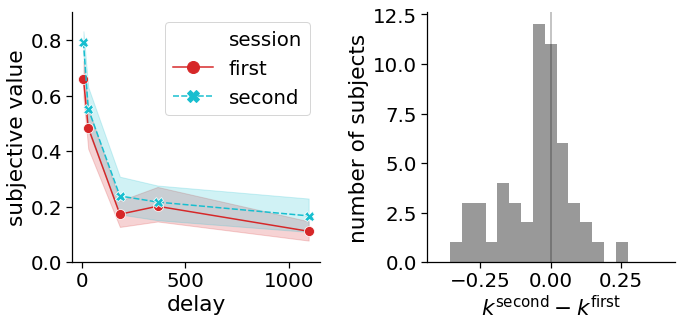

In [11]:
ax1, ax2 = plot_discounting_and_k_hist(k_diff = k_values_session['second'] - k_values_session['first'], 
                                       indifference_points=ip_session, by='session', 
                                       palette='tab10', colors=['C3', 'C9'], log=False)

ax2.set_xlabel(r'$k^{\mathrm{second}}-k^{\mathrm{first}}$');
plt.savefig(os.path.join(figure_path, 'k_session_prereg'+figure_format))

# Hypothesis 2 (exploratory)

In [48]:
k_values_task_log, ip_task = helper.get_k_values(choices, by='task', log=True)
k_values_session_log, ip_session = helper.get_k_values(choices, by='session', log=True)

D:\source\beyond_the_reach\data_analysis\helper_functions.py:55: FutureWarning: 'subj_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  indiff_points = (choices_sc.groupby(['subj_id', by, 'll_delay'])
D:\source\beyond_the_reach\data_analysis\helper_functions.py:55: FutureWarning: 'task' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  indiff_points = (choices_sc.groupby(['subj_id', by, 'll_delay'])


C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


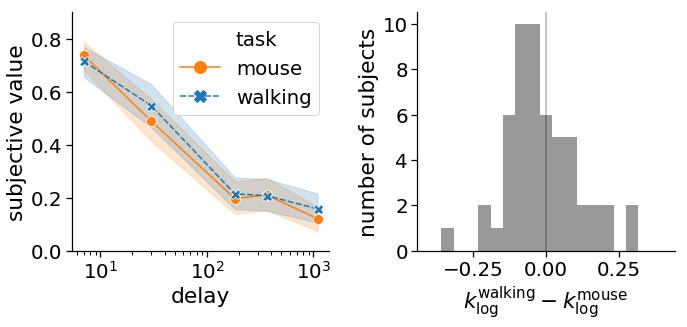

In [12]:
ax1, ax2 = plot_discounting_and_k_hist(k_diff = k_values_task_log['walking'] - k_values_task_log['mouse'], 
                                       indifference_points=ip_task, by='task', 
                                       palette='tab10', colors=['C1', 'C0'], log=True)

ax2.set_xlabel(r'$k_{\log}^{\mathrm{walking}}-k_{\log}^{\mathrm{mouse}}$');
plt.savefig(os.path.join(figure_path, 'k_task_log'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


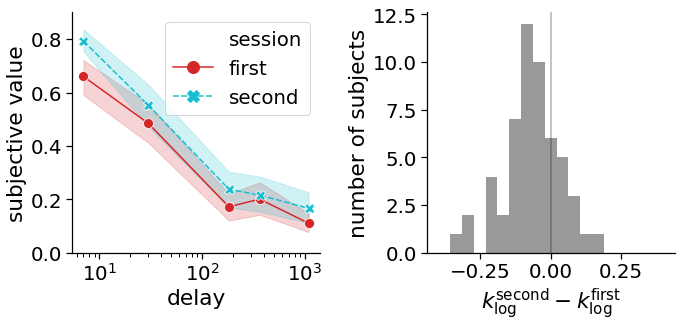

In [13]:
ax1, ax2 = plot_discounting_and_k_hist(k_diff = k_values_session_log['second'] - k_values_session_log['first'], 
                                       indifference_points=ip_session, by='session', 
                                       palette='tab10', colors=['C3', 'C9'], log=True)

ax2.set_xlabel(r'$k_{\log}^{\mathrm{second}}-k_{\log}^{\mathrm{first}}$');
plt.savefig(os.path.join(figure_path, 'k_session_log'+figure_format))

In [60]:
from scipy import stats

def print_ttest_results(x):
    print(stats.ttest_1samp(x, 0))
    print('Effect size %.4f' % (x.mean()/x.std()))

print_ttest_results(k_values_task_log['walking'] - k_values_task_log['mouse'])
print_ttest_results(k_values_session_log['second'] - k_values_session_log['first'])

Ttest_1sampResult(statistic=-0.8399103463427159, pvalue=0.4047316099729724)
Effect size -0.1143
Ttest_1sampResult(statistic=-4.749600976982611, pvalue=1.5924348321583225e-05)
Effect size -0.6463


# Number of changes-of-minds

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


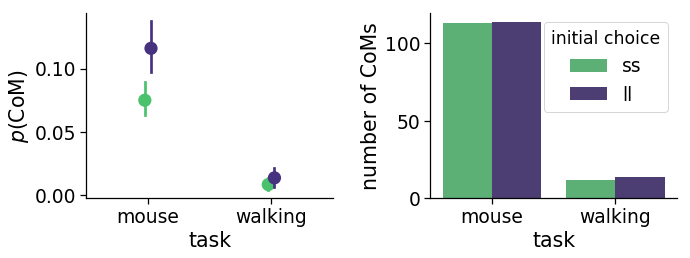

In [110]:
sns.set_palette('viridis')
sns.set_context('notebook', font_scale=1.7)

choices['is_ss_initially'] = (choices['option_chosen'] == 'ss')
choices.loc[choices.is_com, 'is_ss_initially'] = ~choices.loc[choices.is_com, 'is_ss_initially']
choices['initial_choice'] = 'll'
choices.loc[choices.is_ss_initially, 'initial_choice'] = 'ss'

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], figure=fig)

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

sns.pointplot(data=choices, x='task', y='is_com', hue='initial_choice', scale=1.5,
              palette=['C4', 'C0'], join=False, dodge=True, ax=ax1)
ax1.get_legend().remove()
ax1.set_ylabel('$p(\mathrm{CoM})$')
# sns.despine(bottom=True)

sns.countplot(data=choices[choices.is_com], x='task', hue='initial_choice', 
                   palette=['C4', 'C0'], saturation=0.7, ax=ax2)
ax2.get_legend().set_title('initial choice')
ax2.set_ylabel('number of CoMs')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(figure_path, 'com_freq'+figure_format))

In [30]:
choices.groupby(['task', 'initial_choice']).apply(lambda c: len(c[c.is_com])/len(c))

C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'task' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


task     initial_choice
mouse    ll                0.115972
         ss                0.074983
walking  ll                0.013685
         ss                0.008403
dtype: float64

In [71]:
com_count = choices[(choices.is_com) & (choices.task=='mouse')].groupby('subj_id').size()

C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'subj_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Ttest_1sampResult(statistic=-2.602637802658577, pvalue=0.035289402625918245)
Effect size -0.9202


C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


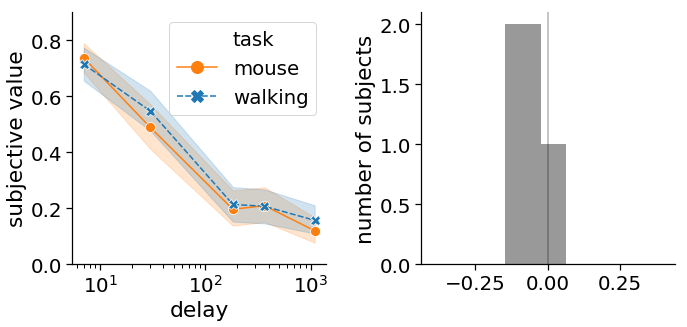

In [66]:
k_values_task_log_filtered = k_values_task_log[k_values_task_log.subj_id.isin(com_count[~(com_count>1)].index)]
print_ttest_results(k_values_task_log_filtered['walking'] - k_values_task_log_filtered['mouse'])
ax1, ax2 = plot_discounting_and_k_hist(k_diff = k_values_task_log_filtered['walking'] - k_values_task_log_filtered['mouse'], 
                                       indifference_points=ip_task, by='task', 
                                       palette='tab10', colors=['C1', 'C0'], log=True)

Dshemuchadze et al suggest that there is bias (trajectories are more direct towards the SS option), O'Hora et al suggest that there is bias towards LL. The direction of the bias might affect the difference between the tasks. However, in the mouse task there is no bias in RT